In [3]:
import os
from nibabel.testing import data_path
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2

/anaconda/envs/py35/lib/python3.5/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)
/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
# Read Files
niftis_path = './Dataset/media/nas/01_Datasets/CT/LITS/Training Batch 1/'

# Write Database here
root_process_database = './LiTS_database/'

folder_volumes = os.path.join(root_process_database, 'images_volumes/')
folder_seg_liver = os.path.join(root_process_database, 'liver_seg/')
folder_seg_item = os.path.join(root_process_database, 'item_seg/')



In [9]:
#Create Directories if they don't exist
if(not os.path.isdir(folder_volumes)):
    os.mkdir(folder_volumes)

if(not os.path.isdir(folder_seg_liver)):
    os.mkdir(folder_seg_liver)

if(not os.path.isdir(folder_seg_item)):
    os.mkdir(folder_seg_item)

FileNotFoundError: [Errno 2] No such file or directory: './LiTS_database/images_volumes/'

In [ ]:
files_dir = (niftis_path)
copy_files_dir = files_dir
filenames = []
list_file_names = []

os.listdir(files_dir)

#Iterate in Batch Folder
for f in os.listdir(files_dir):
    if(f.endswith(".nii")):
        filenames.append(f)



In [31]:
#print(filenames)

['segmentation-3.nii', 'volume-27.nii', 'volume-12.nii', 'volume-25.nii', 'volume-5.nii', 'segmentation-12.nii', 'segmentation-6.nii', 'volume-17.nii', 'volume-26.nii', 'volume-7.nii', 'segmentation-10.nii', 'volume-24.nii', 'segmentation-19.nii', 'volume-6.nii', 'segmentation-11.nii', 'volume-21.nii', 'volume-4.nii', 'segmentation-0.nii', 'volume-8.nii', 'volume-19.nii', 'volume-2.nii', 'segmentation-8.nii', 'volume-0.nii', 'segmentation-9.nii', 'segmentation-26.nii', 'segmentation-4.nii', 'volume-9.nii', 'segmentation-23.nii', 'segmentation-25.nii', 'volume-22.nii', 'volume-20.nii', 'volume-16.nii', 'volume-11.nii', 'segmentation-16.nii', 'volume-23.nii', 'volume-3.nii', 'segmentation-20.nii', 'segmentation-22.nii', 'volume-1.nii', 'segmentation-7.nii', 'segmentation-17.nii', 'segmentation-18.nii', 'segmentation-15.nii', 'segmentation-14.nii', 'segmentation-27.nii', 'segmentation-24.nii', 'volume-14.nii', 'volume-10.nii', 'segmentation-2.nii', 'volume-13.nii', 'segmentation-1.nii', '

In [82]:
filenames = ['volume-0.nii','segmentation-0.nii']

In [84]:
for l in filenames:
    
    
    if(l[0]=='v'):
        print("Processing Volume %s"%l)
        path_file = os.path.join(niftis_path,l)
        folder_volume = os.path.join(folder_volumes,l[8:-4])
        volume = nib.load(path_file)
        #print(volume.dataobj.shape)
        imgs = volume.dataobj
        imgs = np.array(imgs).astype('float32')
        imgs[imgs<-150] = -150
        imgs[imgs>250] = 250
        #print(imgs.shape)
        #print(imgs.min(axis=(0,1)).shape)
        
        img_volume = 255*(imgs - imgs.min(axis=(0,1)))/(imgs.max(axis=(0,1))-imgs.min(axis=(0,1)))
        if(not os.path.isdir(folder_volume)):
            os.mkdir(folder_volume)
        #Iterate over image channels
        for section_id in range(imgs.shape[-1]):
            pass
            section_filename = os.path.join(folder_volume,str(section_id)+".npy")
            np.save(section_filename,img_volume[:,:,section_id])
        
      
        """
        Actual Images - -150 to 250
        Normalized Images - 0 to 255
        
        print(img_volume[:,:,0])
        plt.imshow(img_volume[:,:,0],cmap='gray')
        print(np.max(img_volume[:,:,0]))
        print(np.min(img_volume[:,:,0]))
        plt.show()
        
        plt.title("Actual")
        print(imgs[:,:,0])
        plt.imshow(imgs[:,:,0],cmap='gray')
        plt.show()
        """
        
        
        
    
    elif(l[0]=='s'):
        print("Processing Segmentation %s"%l)
        path_file = os.path.join(niftis_path, l)
        index = l.index('-')
        folder_seg_item_num = os.path.join(folder_seg_item, l[index+1:-4])
        folder_seg_liver_num = os.path.join(folder_seg_liver,l[index+1:-4])
        segmentation = nib.load(path_file)
        
    
        img_seg = np.array(segmentation.dataobj).astype('uint8')
        img_seg_item = np.copy(img_seg)
        img_seg_liver = np.copy(img_seg)
        
        
        #plt.imshow(img_seg[:,:,-20],cmap='gray')
        #plt.show()
        
        #Binary Classification
        img_seg_item[img_seg_item==1]=0
        img_seg_item[img_seg_item==2]=1
        
        #Treat tumour pixels as liver mass
        img_seg_liver[img_seg_item==1]=1
        
        #actually a liver
        img_seg_liver[img_seg_liver==2]=1
        
        
        #print(np.unique(img_seg_liver,return_counts=True))
        
        #plt.imshow(img_seg_liver[:,:,-20],cmap='gray')
        #plt.show()
        
        #Create Directory for Lesions
        if not os.path.isdir(folder_seg_item_num):
            os.mkdir(folder_seg_item_num)
            
        #Create Directory for Liver
        if not os.path.isdir(folder_seg_liver_num):
            os.mkdir(folder_seg_liver_num)
         
        
        for j in range(img_seg.shape[-1]):
            
            item_seg_section = img_seg_item[:,:,j]*255
            liver_seg_section = img_seg_liver[:,:,j]*255
            filename_for_seg_item_section = os.path.join(folder_seg_item_num, str(j)+'.png')
            filename_for_seg_liver_section = os.path.join(folder_seg_liver_num,str(j)+'.png')
            cv2.imwrite(filename_for_seg_item_section,item_seg_section)
            cv2.imwrite(filename_for_seg_liver_section,liver_seg_section)
            #plt.figure(j)
            #plt.title("figure "+str(j))
            #plt.imshow(liver_seg_section,cmap='gray')
            #plt.show()
            

Processing Volume volume-0.nii
Processing Segmentation segmentation-0.nii


/anaconda/envs/py35/lib/python3.5/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


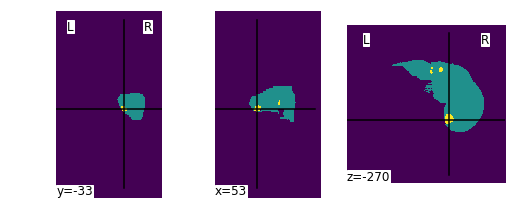

In [31]:
plotting.plot_img(imgs)